Assignment on preprocessing
Do the following on titanic dataset
1. Load the dataset into python environment
2. Do all the necessary pre-processing steps
3. Create kNN and SVM models
4. Do k-fold and stratified stratified k-fold cross validation techniques and find 
the average accuracy score of the models

In [1]:
# imprting all the libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading data
data = pd.read_csv('/Users/geethuvishnu/Downloads/titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

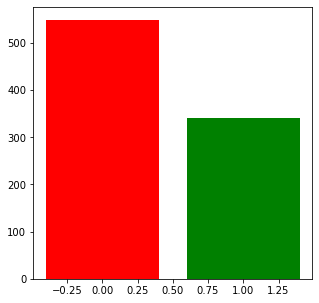

In [9]:
plt.figure(figsize=(5,5))
plt.bar(list(data['Survived'].value_counts().keys()),list(data['Survived'].value_counts()),color=['r','g'])
plt.show()

In [10]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

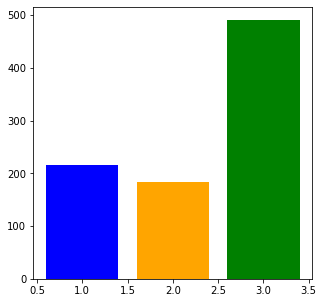

In [11]:
plt.figure(figsize=(5,5))
plt.bar(list(data['Pclass'].value_counts().keys()),list(data['Pclass'].value_counts()),color=["Green","blue","orange"])
plt.show()


In [12]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

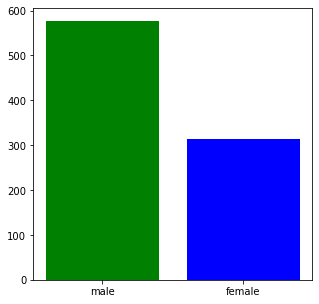

In [13]:
plt.figure(figsize=(5,5))
plt.bar(list(data['Sex'].value_counts().keys()),list(data['Sex'].value_counts()),color=["Green","blue"])
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

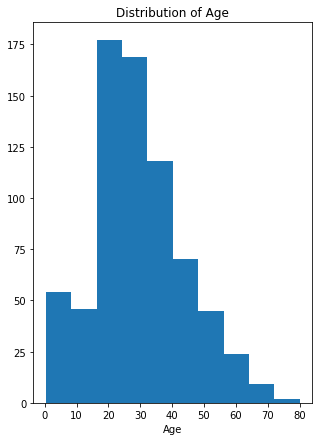

In [14]:
plt.figure(figsize=(5,7))
plt.hist(data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show

In [15]:
# Survived is the dependent variable
# Age is the dependent variable

In [16]:
# checking for null values
data['Survived'].isna().sum()


0

In [17]:
data['Age'].isna().sum()

177

In [18]:
# filling the missing values:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [19]:
data['Age'].isna().sum()

0

In [20]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
# Dropping those columns that won't contribute to our prediction/data

data1 = data.drop(['PassengerId','Name','SibSp','Ticket','Fare','Cabin','Embarked','Parch'],axis=1)

In [22]:
data1.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [23]:
# One hot encoding the sex Column

In [24]:
data1 = pd.get_dummies(data1)

In [25]:
data1.head()

,Survived,Pclass,Age,Sex_female,Sex_male
0,0,3,22.0,0,1
1,1,1,38.0,1,0
2,1,3,26.0,1,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1


In [26]:
# Fixing the target colum:

x = data1.drop(['Survived'],axis=1)
y = data1['Survived']

In [27]:
# splitting data into train data ,test data

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
# creating SVM Model:(using linear kernel)

from sklearn.svm import SVC


clf_svm = SVC(kernel='linear') 
clf_svm = clf_svm.fit(x_train,y_train)
y_pred_svm1 = clf_svm.predict(x_test)

In [29]:
y_pred_svm1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [31]:
#Accuracy > 0.9 as an excellent score, Accuracy > 0.7 as a good one, and any other score as the poor one.

In [32]:
confusion_matrix(y_test,y_pred_svm1) #22+17= 39 missclassifications are there

array([[88, 17],
       [22, 52]])

In [33]:
accuracy_score(y_test,y_pred_svm1)   # good accuracy score

0.7821229050279329

In [34]:
# creating SVM Model:(using rbf kernel)

svm_clf = SVC(kernel='rbf')
svm_clf = svm_clf.fit(x_train,y_train)
y_pred_svm2 = svm_clf.predict(x_test)

In [35]:
confusion_matrix(y_test,y_pred_svm2)    # 72 missclassifications

array([[102,   3],
       [ 69,   5]])

In [36]:
accuracy_score(y_test,y_pred_svm2)      # Accuracy decreased

0.5977653631284916

In [37]:
## creating KNN Model:

from sklearn.neighbors import KNeighborsClassifier 

metric_k =[]
neighbors = range(3,18)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(x_train,y_train)
    y_pred_kNN = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)



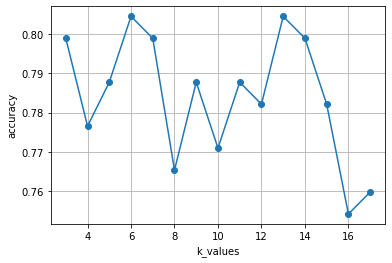

In [38]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("k_values")
plt.ylabel("accuracy")
plt.grid()

In [39]:
classifier = KNeighborsClassifier(n_neighbors=14)
classifier = classifier.fit(x_train,y_train)
y_pred_kNN = classifier.predict(x_test)

In [40]:
confusion_matrix(y_test,y_pred_kNN)  # no: of miss classification reduced to 36

array([[97,  8],
       [28, 46]])

In [41]:
accuracy_score(y_test,y_pred_kNN)   # accuracy score also increased

0.7988826815642458

In [42]:
from sklearn.metrics import precision_score,recall_score

In [43]:
precision_score(y_test,y_pred_kNN)

0.8518518518518519

In [44]:
recall_score(y_test,y_pred_kNN)

0.6216216216216216

accuracy_score = 0.7988826815642458

KNN MODEL THUS BEST FITS OUR DATA WHEN COMPARED TO SVM MODEL

In [45]:
# Doing k-Fold Validation On KNN MODEL:

In [46]:
knn = KNeighborsClassifier(n_neighbors=14)
knn = classifier.fit(x_train,y_train)

In [47]:
score_KNN = knn.score(x_test,y_test)

In [48]:
print(score_KNN)

0.7988826815642458


In [49]:
# Doing K_Fold Validation:

from sklearn.model_selection import KFold

In [50]:
KFold_validator = KFold(5)

In [51]:
for train_index,test_index in KFold_validator.split(x,y):
    print("Training Index : ",train_index)
    print("Test Index : ",test_index)

Training Index :  [179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 

In [52]:
# checking cross validation score:

from sklearn.model_selection import cross_val_score

In [53]:
cv_result = cross_val_score(knn,x,y,cv=KFold_validator)

In [54]:
print(cv_result)

[0.76536313 0.76404494 0.78089888 0.71910112 0.79775281]


In [55]:
np.mean(cv_result)

0.7654321762601217

In [56]:
# Doing Stratified KFold Validation

In [57]:
from sklearn.model_selection import StratifiedKFold

In [58]:
skfold_validator = StratifiedKFold(n_splits=5)

In [59]:
for train_index,test_index in skfold_validator.split(x,y):
    print("Training Index : ",train_index)
    print("Test Index : ",test_index)

Training Index :  [168 169 170 171 173 174 175 176 177 178 179 180 181 182 185 188 189 191
 196 197 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 

In [60]:
skcv_result = cross_val_score(knn,x,y,cv=skfold_validator)

In [61]:
skcv_result

array([0.76536313, 0.75842697, 0.79775281, 0.78089888, 0.78089888])

In [62]:
np.mean(skcv_result)

0.7766681313163015